# Jupyter Notebook Title

## Contents of Notebook
Description of contents:

Example Github Project

Author: Don Cameron


Contact: donrcameron@gmail.com, +61 (0) 413208746

### Notebook magic commands

In [1]:
%matplotlib inline


### Notebook imports

In [2]:
# all imports should go here

import pandas as pd
import sys
import os
import subprocess
import datetime
import platform
import datetime

import matplotlib.pyplot as plt


### Notebook version status

In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [4]:
# show info to support reproducability

def python_env_name():
    envs = subprocess.check_output('conda env list').splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(filter(lambda s: '*' in str(s), envu))[0]
    env_name = str(active_env).split()[0]
    return env_name
#end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)

print('current wkg dir: ' + os.getcwd())
print('Notebook name: ' + theNotebook)
print('Notebook run at: ' + str(datetime.datetime.now())+ ' local time')
print('Notebook run at: ' + str(datetime.datetime.utcnow()) + ' UTC') 
print('Notebook run on: ' + platform.platform())


python version : 3.6.3 | packaged by conda-forge | (default, Nov  4 2017, 10:10:42) [MSC v.1900 64 bit (AMD64)]
python environment : root36
pandas version : 0.21.0
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\GithubNotebookProject\develop
Notebook name: 2018-01-31-dc-Github NoteBook
Notebook run at: 2018-02-05 15:19:32.767872 local time
Notebook run at: 2018-02-05 05:19:32.767872 UTC
Notebook run on: Windows-10-10.0.16299-SP0


### get current GIT identification

In [6]:
# Return the git revision as a string
# refer to https://stackoverflow.com/questions/14989858/get-the-current-git-hash-in-a-python-script

def git_version():
    def _minimal_ext_cmd(cmd):
        # construct minimal environment
        env = {}
        for k in ['SYSTEMROOT', 'PATH']:
            v = os.environ.get(k)
            if v is not None:
                env[k] = v
            #end if
        #end for
        # LANGUAGE is used on win32
        env['LANGUAGE'] = 'C'
        env['LANG'] = 'C'
        env['LC_ALL'] = 'C'

        out = subprocess.Popen(cmd, stdout = subprocess.PIPE, env=env).communicate()[0]
   
        return out
    #end _minimal_ext_cmd

    #  GIT_LOCATION is the path of the git executable
    GIT_LOCATION = 'C:\\Users\\donrc\\AppData\\Local\\GitHub\\PortableGit_f02737a78695063deace08e96d5042710d3e32db\\cmd\\git.exe'
    
    # get version id of form 
    # f83a90d8335eb9c5dce01781e66cbe7bd9ed8b92
    try:
        out = _minimal_ext_cmd([GIT_LOCATION, 'rev-parse', 'HEAD'])
        GIT_REVISION = out.strip().decode('ascii')
    except OSError as e:
        print(' OS Error in getting GIT revision using: '+GIT_LOCATION, e)
        GIT_REVISION = "Unknown"
    #end try
    
    # get current branch name
    try:
        out = _minimal_ext_cmd([GIT_LOCATION, 'symbolic-ref', 'HEAD'])
        GIT_BRANCH = out.strip().decode('ascii')
    except OSError as e:
        print(' OS Error in getting GIT branch using: '+GIT_LOCATION, e)
        GIT_BRANCH = "Unknown"
    #end try
    
    # get short form of version, like
    # f83a90d  (this may include tag information)
    try:
        out = _minimal_ext_cmd([GIT_LOCATION, 'describe', '--always'])
        GIT_REVSHORT = out.strip().decode('ascii')
    except OSError as e:
        print(' OS Error in getting GIT short revision using: '+GIT_LOCATION, e)
        GIT_REVSHORT = "Unknown"
    #end try
    
    # show top level of local GIT repository
    try:
        out = _minimal_ext_cmd([GIT_LOCATION, 'rev-parse', '--show-toplevel'])
        GIT_REPOSITORY = out.strip().decode('ascii')
    except OSError as e:
        print(' OS Error in getting GIT local repository name using: '+GIT_LOCATION, e)
        GIT_REPOSITORY = "Unknown"
    #end try
    
    # show remote GIT repository
    try:
        out = _minimal_ext_cmd([GIT_LOCATION, 'remote', '--verbose'])
       
        # decode binary array to ascii, split on newlines, split line 0 on blank, skip first 6 chars
        GIT_REMOTE = out.strip().decode('ascii').split('\n')[0].split(' ')[0][7:]
    except OSError as e:
        print(' OS Error in getting GIT remote repository name using: '+GIT_LOCATION, e)
        GIT_REMOTE = "Unknown"
    #end try
    
  # show tags info
    try:
        out = _minimal_ext_cmd([GIT_LOCATION, 'describe', '--tags', '--long'])
       
        # decode binary array to ascii,
        GIT_TAGS = out.strip().decode('ascii')
    except OSError as e:
        print(' OS Error in getting GIT tags information using: '+GIT_LOCATION, e)
        GIT_TAGS = "Unknown"
    #end try

    return (GIT_BRANCH, GIT_REVISION, GIT_TAGS, GIT_REVSHORT, GIT_REPOSITORY, GIT_REMOTE)
#end get_version

print("GIT identification: ", git_version())


GIT identification:  ('refs/heads/master', '42a8ead969ac2631c69d883c68f1134ef4df77b7', 'v1.0-1-g42a8ead', '42a8ead', 'C:/Users/donrc/Documents/JupyterNotebooks/GithubNotebookProject', 'https://github.com/coolum001/GithubNotebookProject.git')


In [1]:
print('Hi')

Hi


In [1]:
print('Cell created in dev branch')

Cell created in dev branch


### Customizations for notebook

In [9]:
# path to saved figures
FIGURE_PREFIX = '../figures/'

### Required notebooks to be run first

In [5]:
from IPython.display import FileLink
FileLink('../develop/a.ipynb')

C:\Users\donrc\Documents\JupyterNotebooks\TemplateNotebookProject\develop\a.ipynb

### Display associated webpages (eg source of data)

In [6]:
from IPython.display import IFrame
IFrame("http://www.net-analysis.com", width = 800, height = 200)

### Save figures to figures directory

../figures/Test20170218-193200.jpg saved.


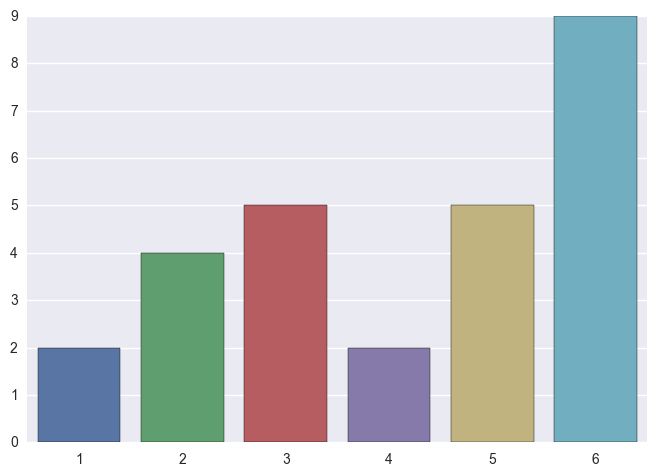

In [16]:
def save_figure(figure_title='TemplateNotebookFigure', figure_prefix='../figures/'):
    """
     save_figure:  same the current matplotlib.pyplot figure as a jpg file

     a file is generated from the supplied title, and the date and time

     Inputs:
     figure_title: string, incorporated into file name
     figure_prefix: string giving relative (or absolute) path the save location
     Returns:
     True is save OK
     False otherwise

     Outputs:
     prints error messages on exceptions

    """

    try:
        fname     = figure_prefix+figure_title+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.jpg'
        plt.savefig(fname)
        print(fname+' saved.')
    except IOError as err:
        print('Unable to save figure - IO Error!')
        print("IO error: {0}".format(err))
    except OSError as err:
        print('Unable to save figure - OS Error!')
        print("OS error: {0}".format(err))
    except:
        print('Unable to save figure - Unexpected Error!')
        print("Unexpected error:", sys.exc_info()[0])
        raise
    #end try
#end save_figure

x         =[1,2,3,4,5,6]
y         =[2,4,5,2,5,9]
plot2     = sns.barplot(x=x, y=y)

save_figure(figure_title='Test', figure_prefix=FIGURE_PREFIX)

plt.show()

### Display images

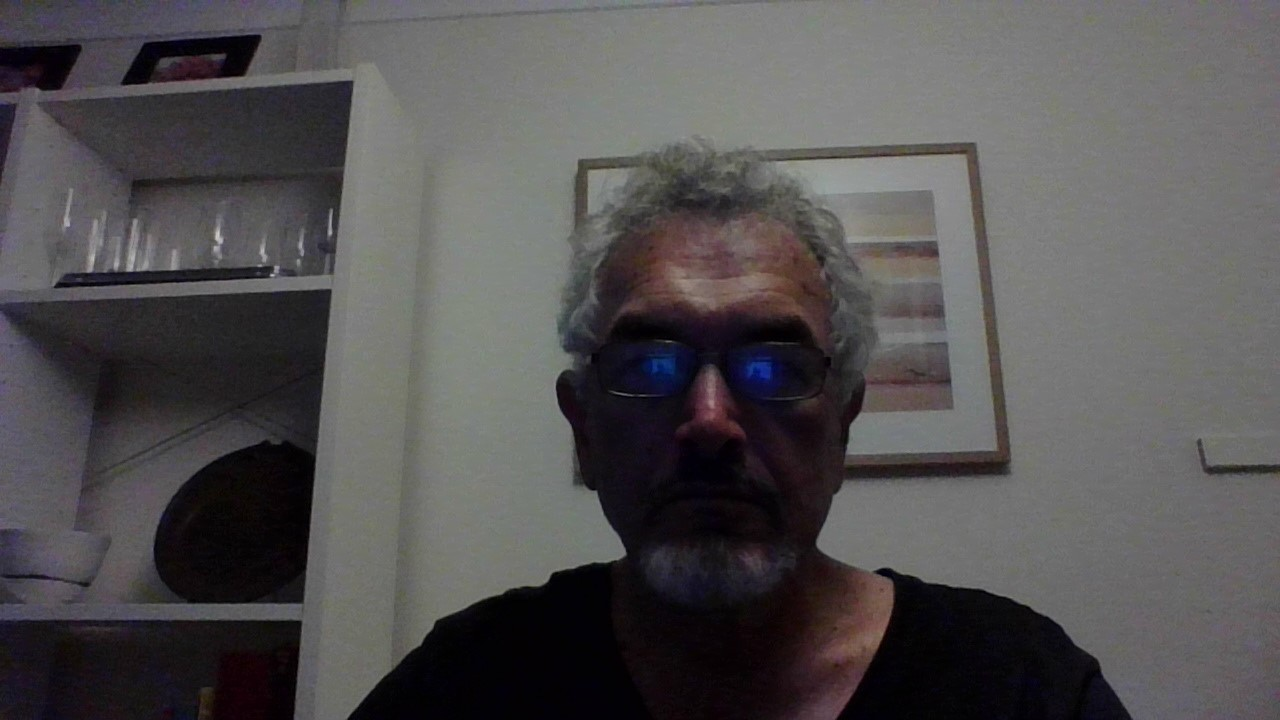

In [8]:
from IPython.display import Image
Image(filename='../figures/apc.jpg', height = 100, width = 200)

## Conclusions / Summary